## Introduction

This notebook includes the following sections:
1. Data Loading and Exploration
2. Data Cleaning
3. Data Analysis
4. Visualization and Insights

Each section is designed to logically progress through the analysis process.

# 🛠 **Setup and Imports**

This section includes the necessary library imports and configurations for the analysis.

In [2]:
import warnings
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
from tqdm import tqdm

# Suppress warnings
warnings.filterwarnings('ignore')

# Define labels
labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']




# 🧠 **Brain Tumor Detection and Classification**
Brain tumors are among the most aggressive diseases affecting both children and adults, accounting for 85–90% of all primary Central Nervous System (CNS) tumors. Annually, around **11,700 people** are diagnosed with brain tumors, with a 5-year survival rate of approximately **34% for men** and **36% for women**. Brain tumors are classified into several types, including:

- **Benign Tumor**  
- **Malignant Tumor**  
- **Pituitary Tumor**  
- And others.  

### **Challenges in Diagnosis**
The most effective detection method is **Magnetic Resonance Imaging (MRI)**, which generates large volumes of image data. Manual analysis by radiologists can be error-prone due to the complexity of tumor structures and properties.

### **Proposed Solution**
Leveraging **Deep Learning Algorithms** for automated detection and classification has demonstrated superior accuracy compared to manual methods. This project employs state-of-the-art techniques such as:  
- **Convolutional Neural Networks (CNNs)**  
- **Artificial Neural Networks (ANNs)**  
- **Transfer Learning (TL)**  

The aim is to develop a system capable of identifying and classifying brain tumors into the following categories:  
- **Glioma Tumor**  
- **No Tumor**  
- **Meningioma Tumor**  
- **Pituitary Tumor**  

This solution holds the potential to support doctors worldwide, enhancing diagnostic accuracy and improving patient outcomes.


## 📂 **Data Loading**

This section loads and explores the dataset.

In [3]:
# Load and preprocess the training and testing data
X_train, y_train = [], []

# Load training data
for label in labels:
    folderPath = os.path.join('C:/Users/youse/Dropbox/PC/Downloads/archive', 'Training', label)
    for filename in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath, filename))
        img = cv2.resize(img, (150, 150))
        X_train.append(img)
        y_train.append(label)

# Load testing data
for label in labels:
    folderPath = os.path.join('C:/Users/youse/Dropbox/PC/Downloads/archive', 'Testing', label)
    for filename in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath, filename))
        img = cv2.resize(img, (150, 150))
        X_train.append(img)
        y_train.append(label)

100%|██████████| 74/74 [00:01<00:00, 41.66it/s]


# 🖼️ **Sample Visualization of Dataset**

This code visualizes one sample image from each label category to provide an overview of the dataset's contents.

### **Steps**:
1. **Figure Setup**:  
   - Creates a 1x4 grid of subplots with a figure size of **20x20**.
   - Adds a title: *"Sample Image From Each Label"*.

2. **Image Selection**:  
   - Iterates over the label categories.  
   - For each label, finds the first matching image in the dataset (`y_train`).

3. **Visualization**:  
   - Displays the selected image with its corresponding label as the title.  
   - Axes are turned off for a cleaner presentation.

This step ensures the dataset is loaded correctly and provides a visual confirmation of the labels.

findfont: Font family 'cairo' not found.
findfont: Font family 'cairo' not found.
findfont: Font family 'cairo' not found.
findfont: Font family 'cairo' not found.
findfont: Font family 'cairo' not found.
findfont: Font family 'cairo' not found.


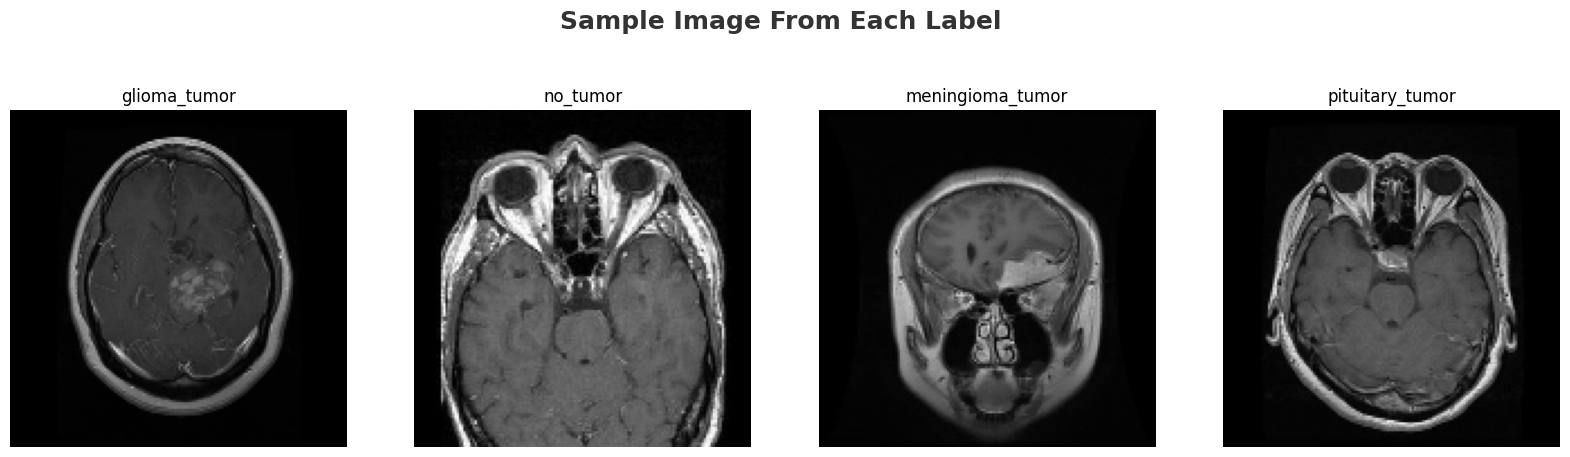

In [ ]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

## 🧹 **Data Preprocessing**

Data cleaning and transformation steps to prepare for analysis.

In [6]:
# Convert to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Preprocess the labels
y_train_new = [labels.index(i) for i in y_train]
y_train = tf.keras.utils.to_categorical(y_train_new, num_classes=4)

# Shuffle the data and split into training and test sets
X_train, y_train = shuffle(X_train, y_train, random_state=2003)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=2003)

# 🧪 **Building and Train Model**


In [7]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))  # Output layer for 4 classes

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=32)

model.save('tumor_classifier_model.keras')


Epoch 1/10


83/83 [==============================] - 53s 617ms/step - loss: 6.7482 - accuracy: 0.5149 - val_loss: 0.8976 - val_accuracy: 0.6156
Epoch 2/10
83/83 [==============================] - 52s 632ms/step - loss: 0.6869 - accuracy: 0.7378 - val_loss: 0.6730 - val_accuracy: 0.7483
Epoch 3/10
83/83 [==============================] - 54s 656ms/step - loss: 0.4844 - accuracy: 0.8176 - val_loss: 0.6446 - val_accuracy: 0.7789
Epoch 4/10
83/83 [==============================] - 58s 695ms/step - loss: 0.3170 - accuracy: 0.8861 - val_loss: 0.7239 - val_accuracy: 0.7653
Epoch 5/10
83/83 [==============================] - 55s 665ms/step - loss: 0.2697 - accuracy: 0.9050 - val_loss: 0.5848 - val_accuracy: 0.7993
Epoch 6/10
83/83 [==============================] - 57s 692ms/step - loss: 0.1543 - accuracy: 0.9470 - val_loss: 0.7380 - val_accuracy: 0.8061
Epoch 7/10
83/83 [==============================] - 56s 670ms/step - loss: 0.0965 - accuracy: 0.9675 - val_loss: 0.8468 - val_accuracy: 0.82

## Epochs vs. Training and Validation Accuracy/Loss

This analysis visualizes the model's performance over 10 epochs, displaying both **training and validation accuracy** as well as **training and validation loss**.

- **Training Accuracy**: Reflects the model's performance on the training data.
- **Validation Accuracy**: Indicates how well the model generalizes on unseen data.
- **Training Loss**: Measures the error during training.
- **Validation Loss**: Shows the error on the validation set.

The plots illustrate:
1. **Accuracy**: Comparison of training and validation accuracy over epochs.
2. **Loss**: Comparison of training and validation loss over epochs.

These insights help evaluate the model's learning curve and generalization capabilities.


## 📈 **Visualization and Results**

Visual representation of results and metrics.

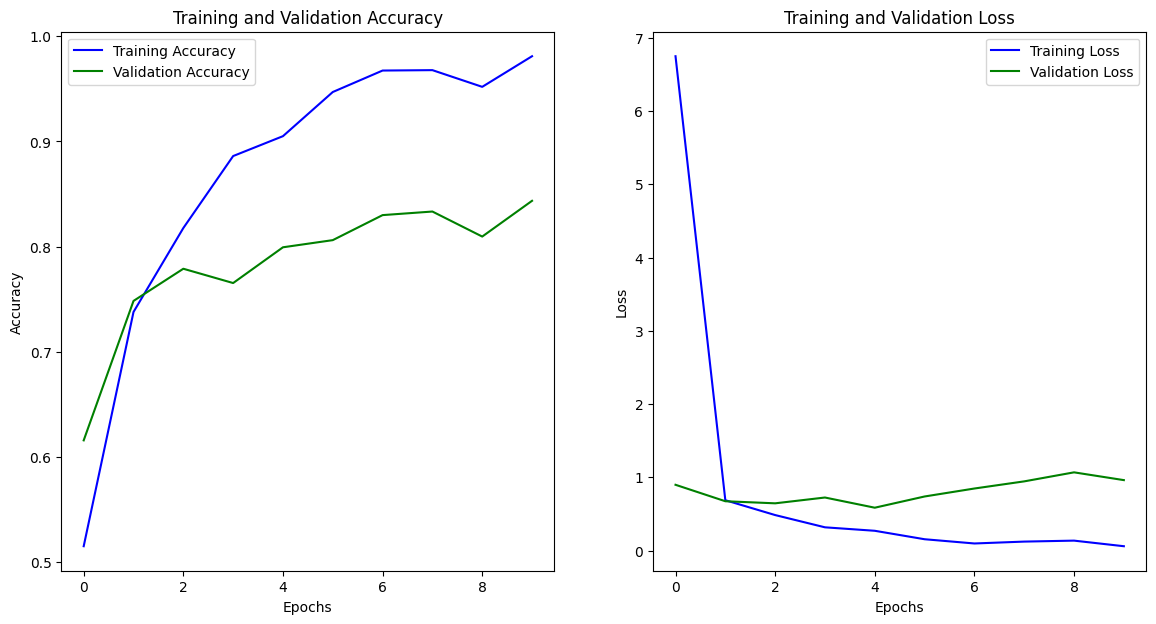

In [8]:
# Plot the training and validation curves
epochs = [i for i in range(10)]
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Accuracy plot
ax[0].plot(epochs, history.history['accuracy'], label='Training Accuracy', color='blue')
ax[0].plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', color='green')
ax[0].set_title('Training and Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

# Loss plot
ax[1].plot(epochs, history.history['loss'], label='Training Loss', color='blue')
ax[1].plot(epochs, history.history['val_loss'], label='Validation Loss', color='green')
ax[1].set_title('Training and Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.show()

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
print(classification_report(y_test_new,pred))

11/11 [==============================] - 2s 153ms/step
              precision    recall  f1-score   support

           0       0.93      0.85      0.88       104
           1       0.82      0.82      0.82        55
           2       0.79      0.86      0.82        90
           3       0.92      0.94      0.93        78

    accuracy                           0.87       327
   macro avg       0.86      0.86      0.86       327
weighted avg       0.87      0.87      0.87       327



## Confusion Matrix: **Heatmap Visualization** 🔥

The confusion matrix provides a detailed breakdown of the model's predictions across all categories, showing how well the model classifies each label (glioma tumor, meningioma tumor, pituitary tumor, and no tumor). The heatmap below visualizes this matrix, with:

- **True Positives** (correctly classified tumors) along the diagonal.
- **False Positives** and **False Negatives** representing misclassified instances.
- The **color intensity** represents the frequency of each prediction, making it easy to identify classification errors.

This visualization helps to quickly assess where the model excels and where it needs improvement.


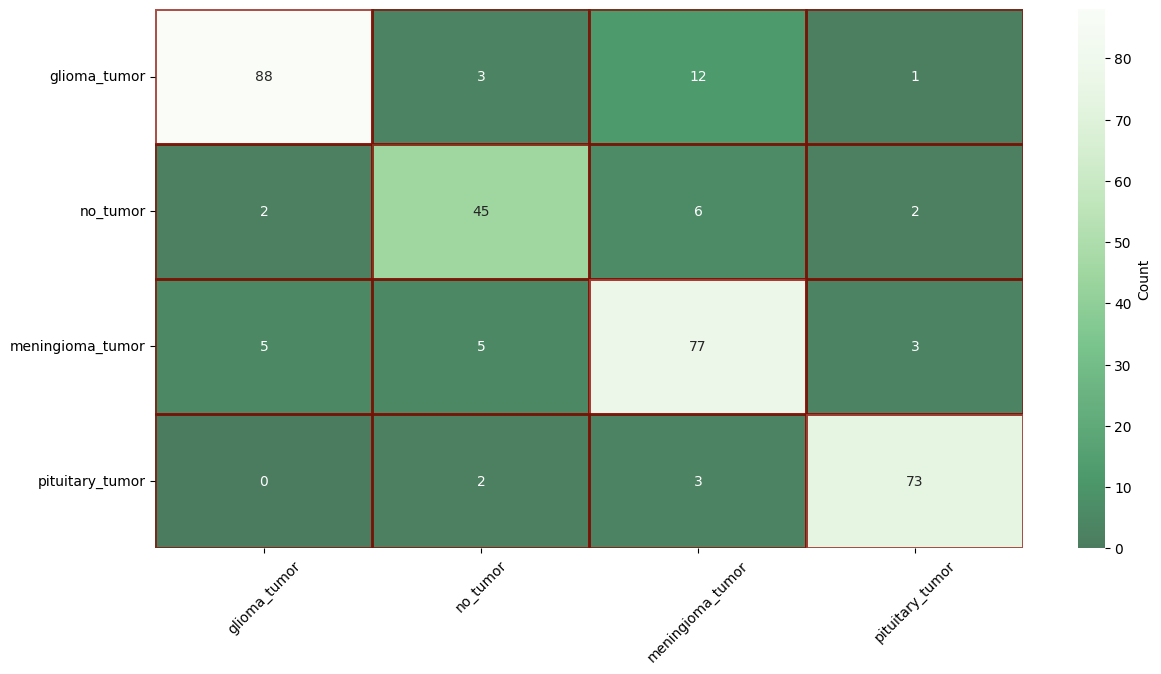

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors
colors_green = sns.color_palette("Greens", as_cmap=True)
colors_dark = sns.color_palette("dark")

# Assuming y_test_new, pred, and labels are defined
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

# Create confusion matrix
conf_matrix = confusion_matrix(y_test_new, pred)

# Plot heatmap
sns.heatmap(conf_matrix, ax=ax, xticklabels=labels, yticklabels=labels, annot=True,
            cmap=colors_green.reversed(), alpha=0.7, linewidths=2, linecolor=colors_dark[3], fmt='d', 
            cbar_kws={'label': 'Count'})

# Customize tick labels
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Display plot
plt.show()


## 📝 **Conclusion**

Summary of findings and next steps.

1/1 [==============================] - 0s 91ms/step
The object is a glioma_tumor


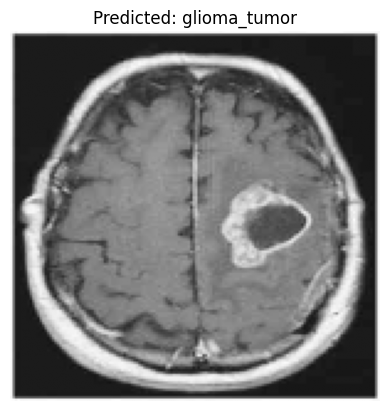

In [22]:
# Predict on a new image
image_path = "C:/Users/youse/Dropbox/PC/Downloads/archive/Testing/glioma_tumor/image(79).jpg"

img = cv2.imread(image_path)
img = cv2.resize(img, (150, 150))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.array([img]) / 255.0  # Normalize the image


prediction = model.predict(img)
index = np.argmax(prediction)

print(f'The object is a {labels[index]}')
plt.imshow(img[0])
plt.title(f'Predicted: {labels[index]}')
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 39ms/step
The object is a no_tumor


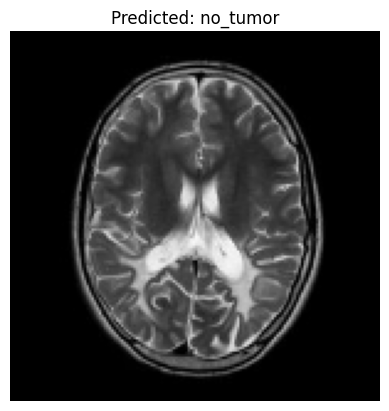

In [23]:
# Predict on a new image
image_path = "C:/Users/youse/Dropbox/PC/Downloads/archive/Testing/no_tumor/image(9).jpg"

img = cv2.imread(image_path)
img = cv2.resize(img, (150, 150))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.array([img]) / 255.0  # Normalize the image


prediction = model.predict(img)
index = np.argmax(prediction)

print(f'The object is a {labels[index]}')
plt.imshow(img[0])
plt.title(f'Predicted: {labels[index]}')
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 32ms/step
The object is a glioma_tumor


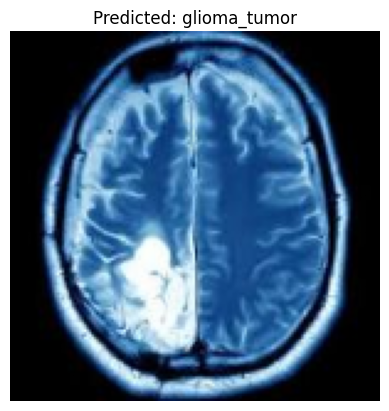

In [24]:
# Predict on a new image
image_path = "C:/Users/youse/Dropbox/PC/Downloads/download.jpeg"

img = cv2.imread(image_path)
img = cv2.resize(img, (150, 150))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.array([img]) / 255.0  # Normalize the image

prediction = model.predict(img)
index = np.argmax(prediction)

print(f'The object is a {labels[index]}')
plt.imshow(img[0])
plt.title(f'Predicted: {labels[index]}')
plt.axis('off')
plt.show()
